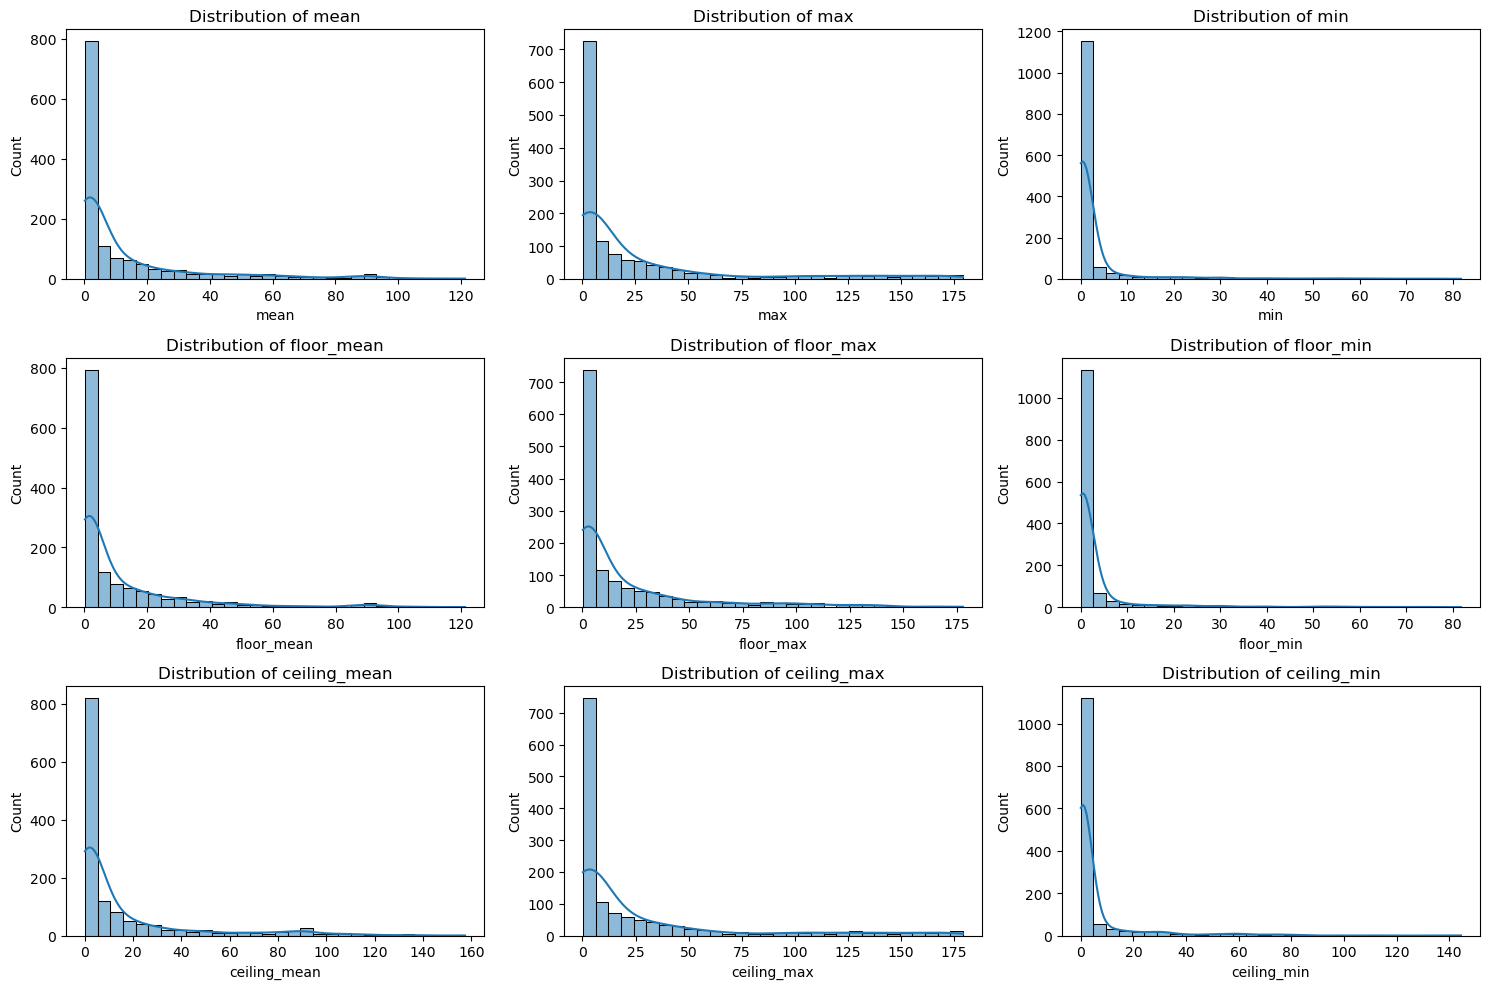

/tmp/ipykernel_172928/1977954331.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.df.corr()


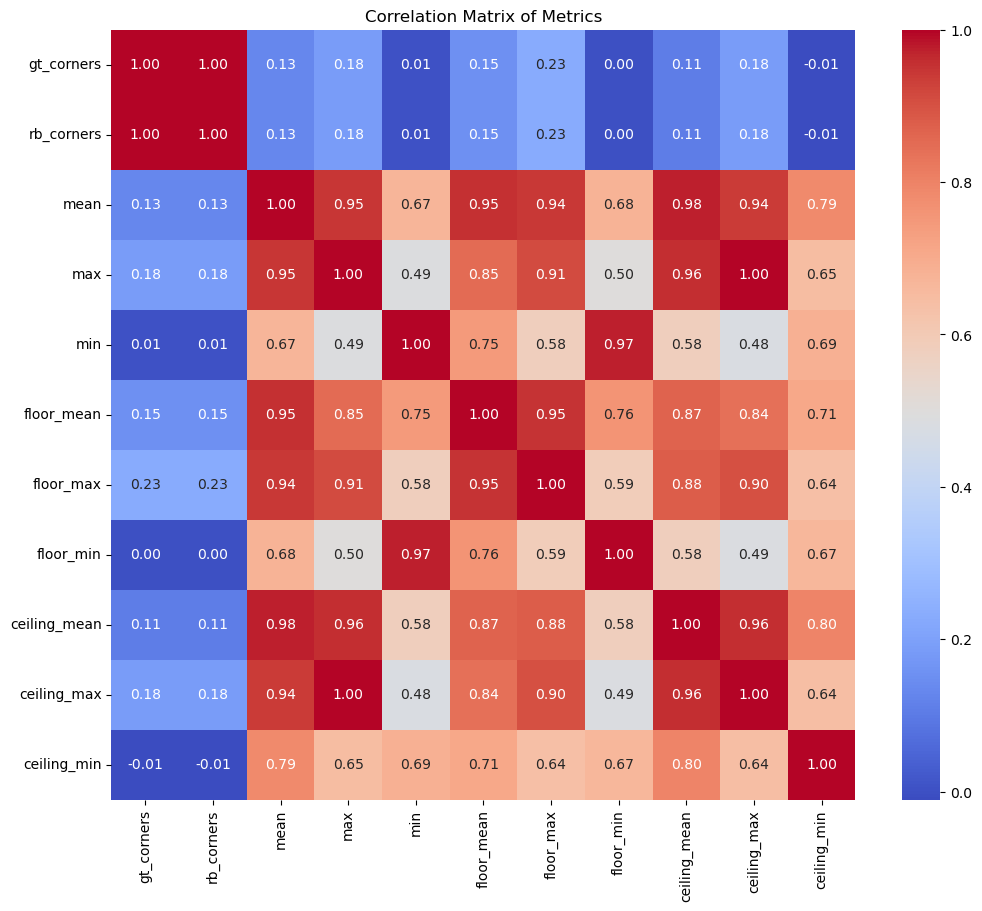

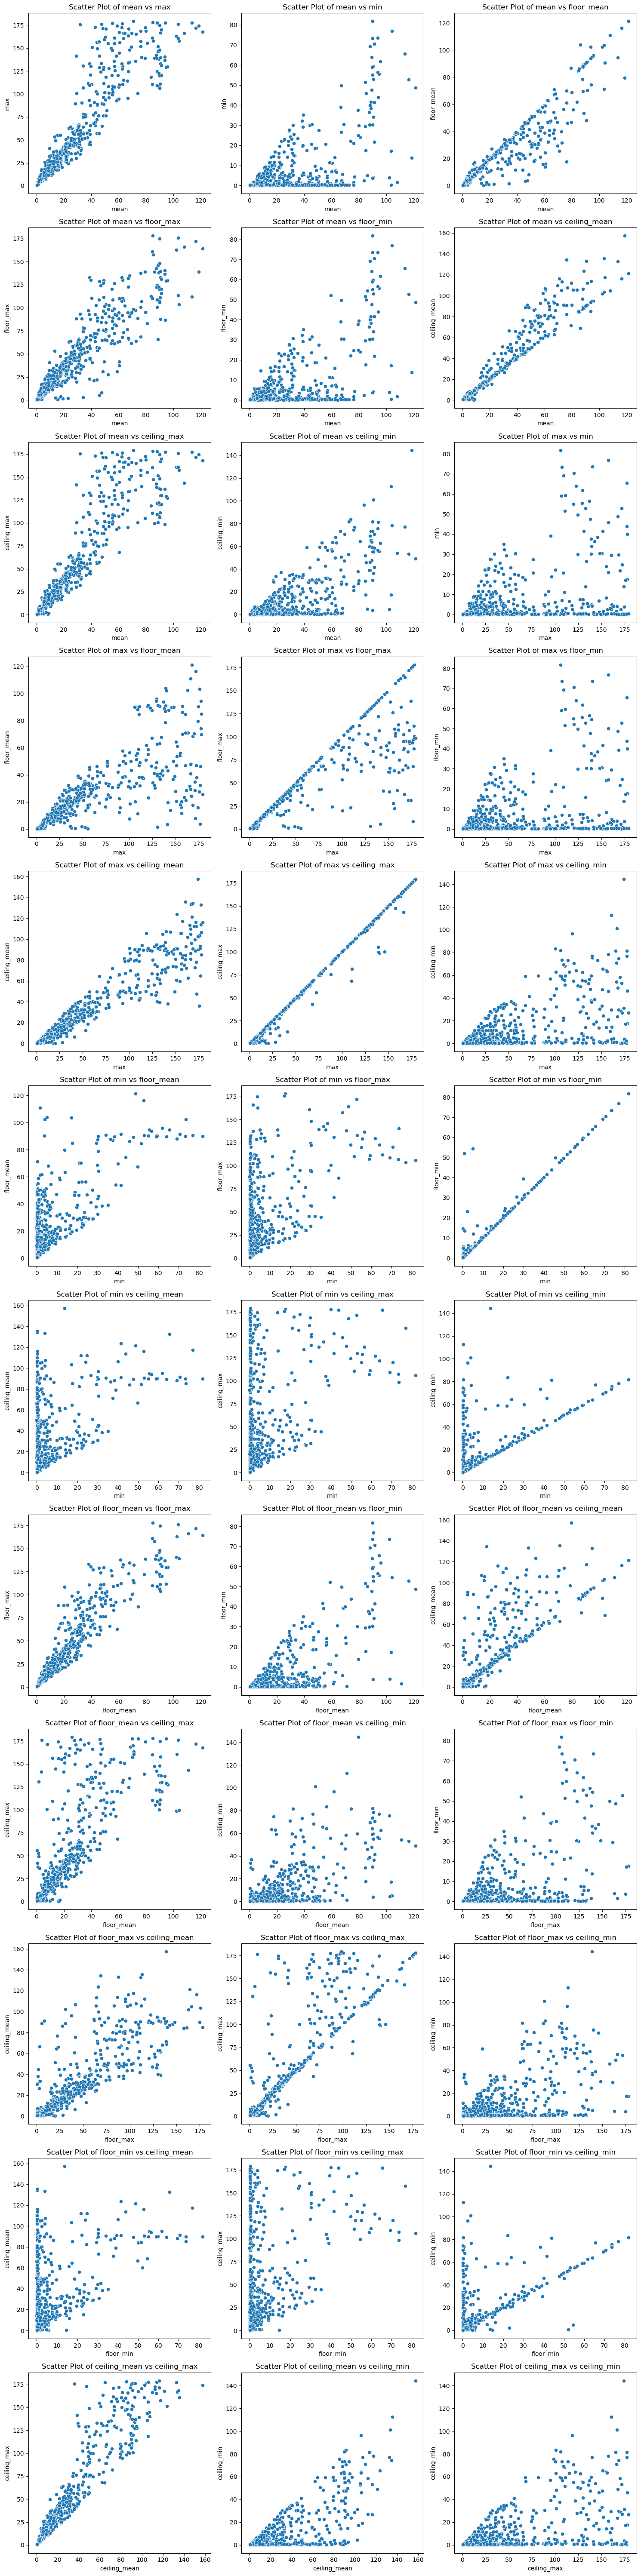

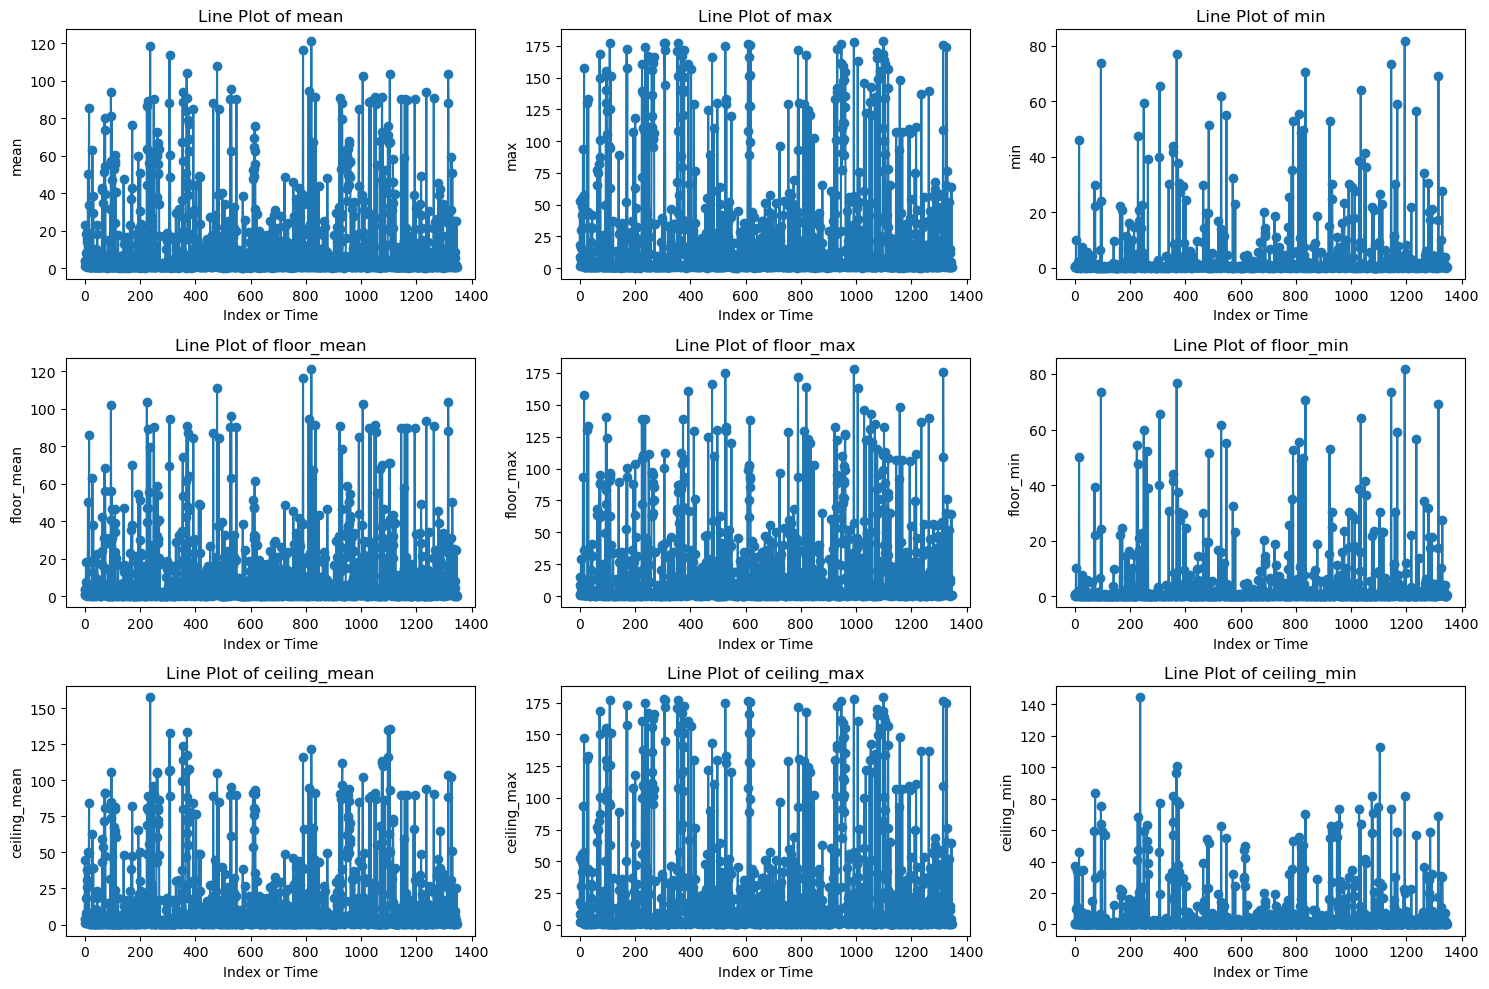

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

class PlotDrawer:
    def __init__(self, json_file):
        self.df = pd.read_json(json_file)
        self.plot_dir = Path("plots")
        self.plot_dir.mkdir(exist_ok=True)
        self.plot_paths = []

    def draw_plots(self):
        metrics = ['mean', 'max', 'min', 'floor_mean', 'floor_max', 'floor_min', 'ceiling_mean', 'ceiling_max', 'ceiling_min']

        # Histograms
        fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
        for ax, metric in zip(axes.flatten(), metrics):
            sns.histplot(self.df[metric], kde=True, bins=30, ax=ax)
            ax.set_title(f'Distribution of {metric}')
        plt.tight_layout()
        hist_path = self.plot_dir / "all_histograms.png"
        plt.show()
        plt.savefig(hist_path)
        self.plot_paths.append(hist_path)
        plt.close()

        corr_matrix = self.df.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Metrics')
        heatmap_path = self.plot_dir / "correlation_heatmap.png"
        plt.show()
        plt.savefig(heatmap_path)
        self.plot_paths.append(heatmap_path)
        plt.close()
        
        
        scatter_pairs = [(metric1, metric2) for i, metric1 in enumerate(metrics) for metric2 in metrics[i+1:]]
        num_plots = len(scatter_pairs)
        fig, axes = plt.subplots(nrows=num_plots // 3 + (1 if num_plots % 3 else 0), ncols=3, figsize=(15, num_plots * 5 // 3))
        for ax, (metric1, metric2) in zip(axes.flatten(), scatter_pairs):
            sns.scatterplot(x=self.df[metric1], y=self.df[metric2], ax=ax)
            ax.set_title(f'Scatter Plot of {metric1} vs {metric2}')
        plt.tight_layout()
        scatter_path = self.plot_dir / "all_scatter_plots.png"
        plt.show()
        plt.savefig(scatter_path)
        self.plot_paths.append(scatter_path)
        plt.close()
        
        
        fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
        for ax, metric in zip(axes.flatten(), metrics):
            ax.plot(self.df.index, self.df[metric], marker='o', linestyle='-')
            ax.set_title(f'Line Plot of {metric}')
            ax.set_xlabel('Index or Time')
            ax.set_ylabel(metric)
        plt.tight_layout()
        lineplot_path = self.plot_dir / "all_line_plots.png"
        plt.show()
        plt.savefig(lineplot_path)
        self.plot_paths.append(lineplot_path)
        plt.close()
        
        


        return self.plot_paths

plot_drawer = PlotDrawer('deviation.json')
plot_paths = plot_drawer.draw_plots()

